In [2]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema, NanoAODSchema
import json
import fastjet
import numpy as np
import awkward as ak
import hist
import coffea.nanoevents.methods.vector as vector
import matplotlib.pyplot as plt
import warnings
import hist.dask as dhist
import dask
import pickle
import os

/tmp/ipykernel_929177/1893946785.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  import coffea.nanoevents.methods.vector as vector


In [3]:
hgg = ak.from_parquet('/project01/ndcms/cmoore24/skims/skimmed_jets/mc/nolepton/tagged/hgg.parquet')
qcd = ak.from_parquet('/project01/ndcms/cmoore24/skims/skimmed_jets/mc/nolepton/tagged/qcd_470to600.parquet')

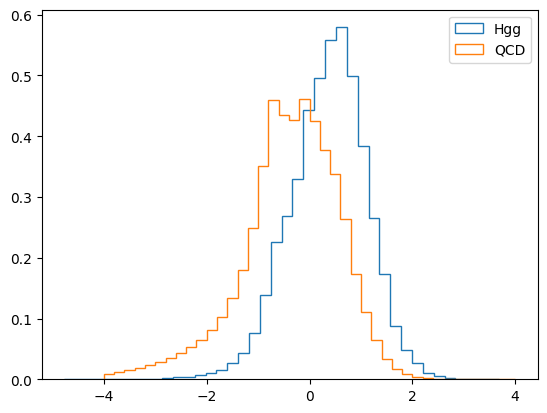

In [4]:
plt.hist(hgg.goodjets.ecf_tagger, bins=40, histtype='step', density=True, label='Hgg')
plt.hist(qcd.goodjets.ecf_tagger, bins=40, histtype='step', range=(-4,4), density=True, label='QCD')
plt.legend()
plt.show()

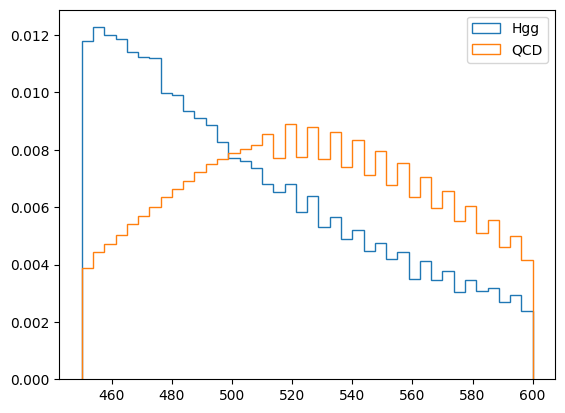

In [7]:
plt.hist(hgg.goodjets.pt, bins=40, histtype='step', density=True, label='Hgg', range=(450,600))
plt.hist(qcd.goodjets.pt, bins=40, histtype='step', range=(450,600), density=True, label='QCD')
plt.legend()
plt.show()

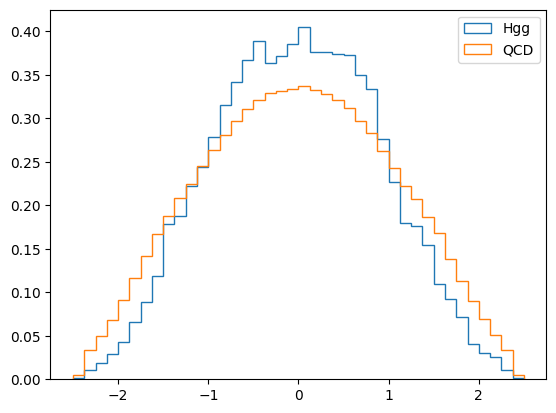

In [30]:
pltrange = (-2.5, 2.5)
plt.hist(hgg.goodjets.eta, bins=40, histtype='step', density=True, label='Hgg', range=pltrange)
plt.hist(qcd.goodjets.eta, bins=40, histtype='step', range=pltrange, density=True, label='QCD')
plt.legend()
plt.show()

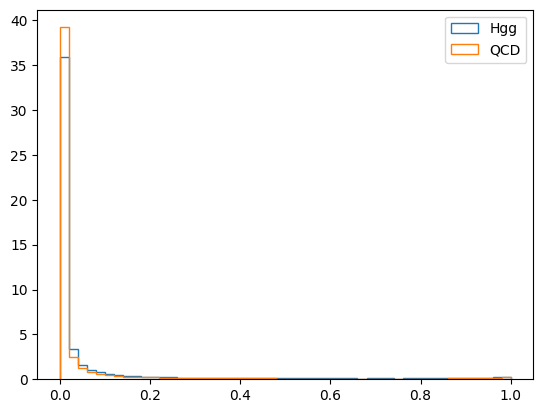

In [45]:
pltrange = (0, 1)
plt.hist(hgg.goodjets.particleNet_HbbvsQCD, bins=50, histtype='step', density=True, label='Hgg', range=pltrange)
plt.hist(qcd.goodjets.particleNet_HbbvsQCD, bins=50, histtype='step', range=pltrange, density=True, label='QCD')
plt.legend()
plt.show()

In [24]:
hgg.goodjets.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'nConstituents',
 'DDX_tau1_flightDistance2dSig',
 'DDX_tau1_trackEtaRel_0',
 'DDX_tau1_trackEt